['gay_t', 0.55, 1, 1, 0, 1, 0.0, 200, [[], 5], 0.0, 0.0, 4.25]


/var/folders/b6/n9yx9yhx6rg4r08q6mdm1r1m0000gn/T/ipykernel_3217/2815814708.py:57: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  C=plt.colorbar(mappable,shrink=0.6,label=r"$v_{\theta}$")


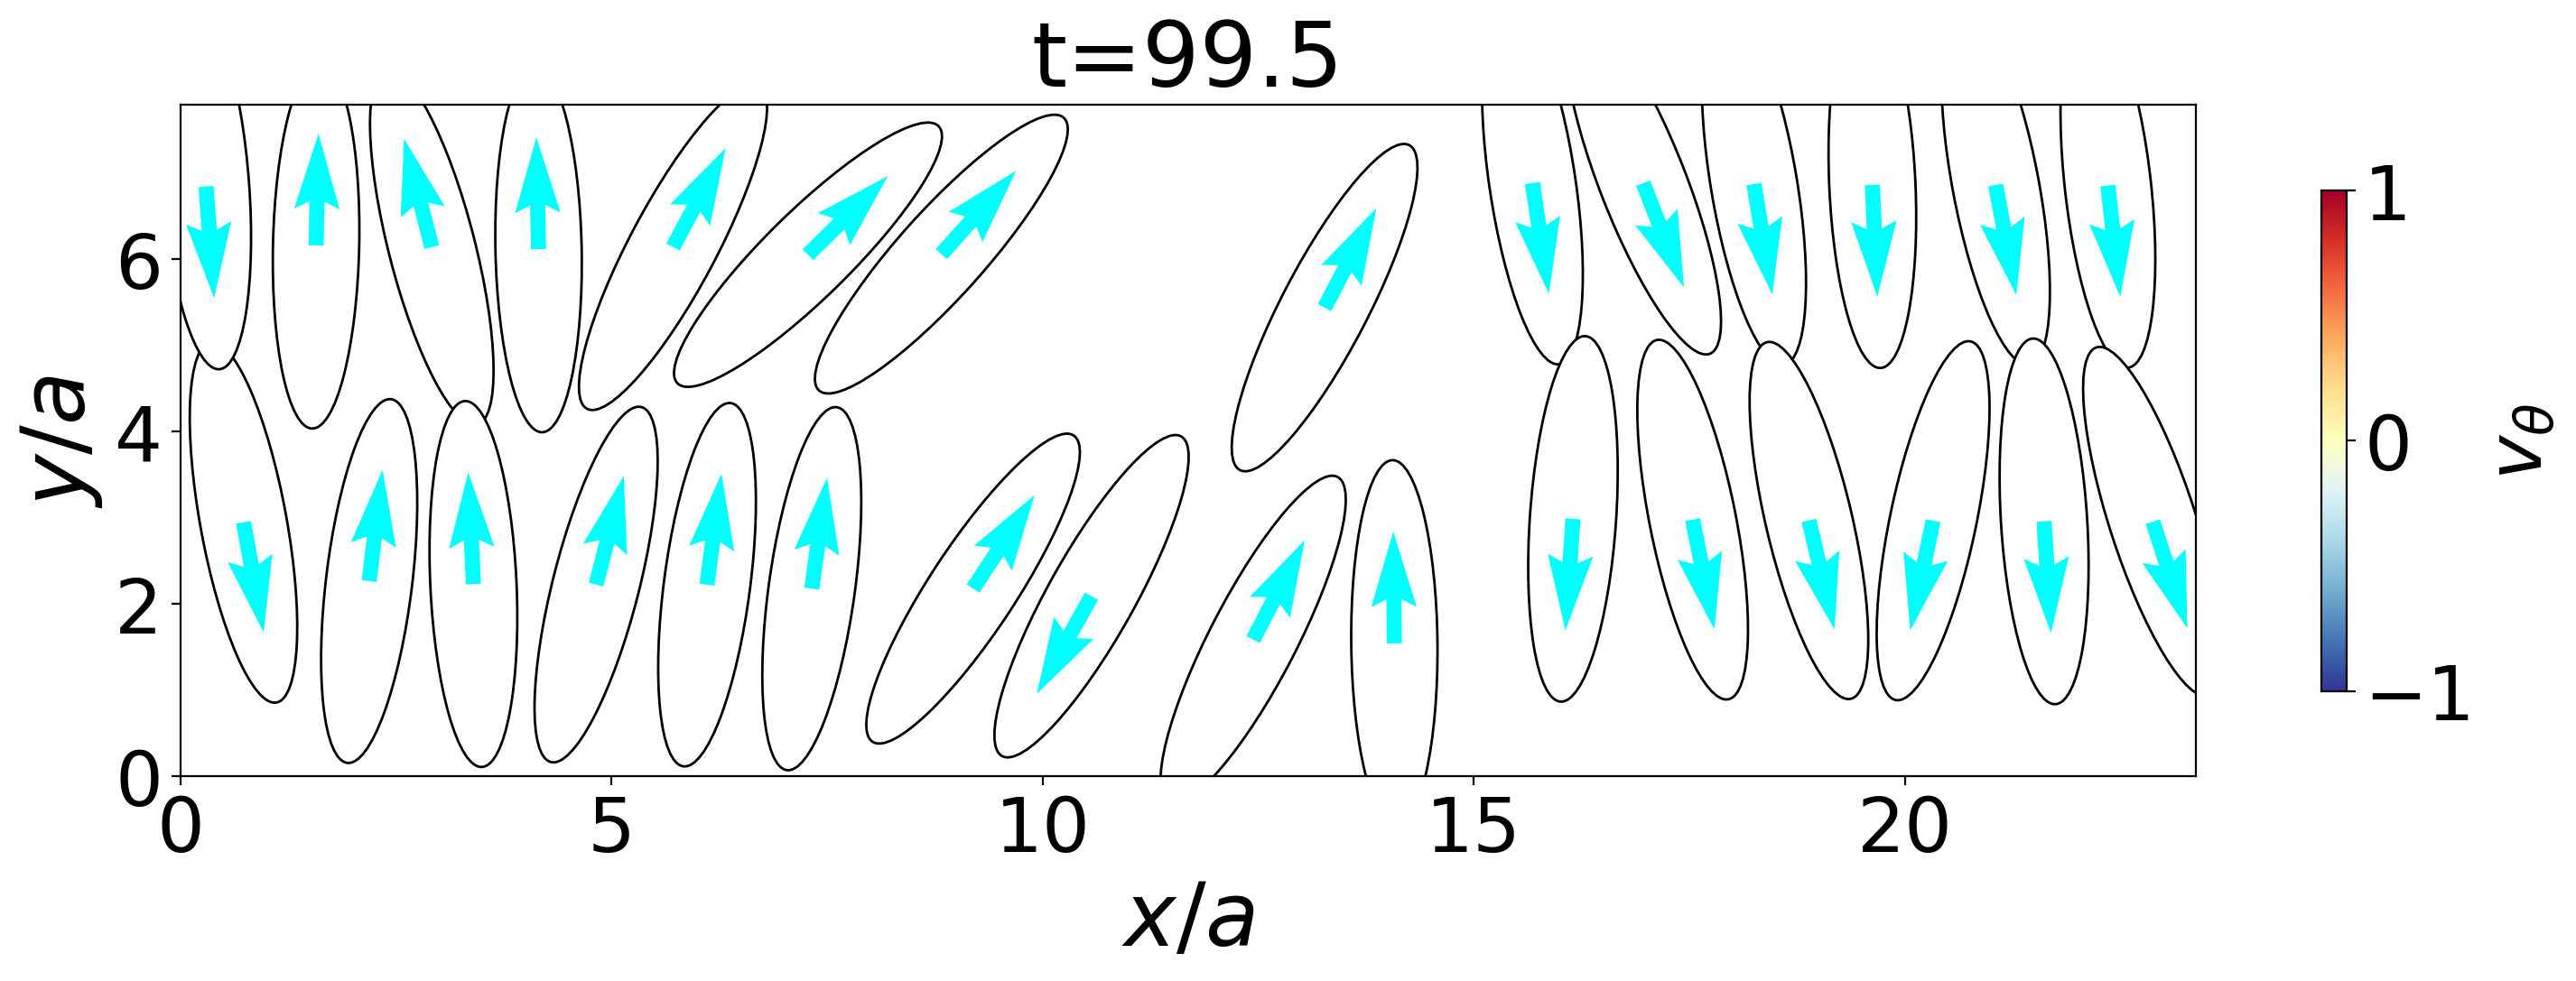

In [30]:
%matplotlib inline
import math
import matplotlib
%config InlineBackend.figure_format = 'retina'
import matplotlib.cm as cm  # colormap
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
# plt.rcParams["text.usetex"] =True
plt.rcParams["font.size"] = 30
#from matplotlib import patches
from matplotlib.collections import EllipseCollection
from matplotlib.patches import Circle

cmap = matplotlib.colormaps["Greys"]
cmap(0)
# Np=12800#8192#2048#
p=[]
def make_animation(moji,moji2,lo,R,tau,v0,Mg,filenum,vminmax,bit,Ms,kap):

    #cbのために適当なマップをダス:;
    # Normalize~mappable~colorbar(mappable)でも可。(粒子数が多いときはこちらの方が良いかも?);
    # アニメーション内部でプロットしたい場合は(update_normal(mappable)？使う前に検討);
    a= np.loadtxt("../{}/{}_animekap{:.2f}lo{:.2f}Ms{:.3f}tau{:.3f}v0{:.1f}/tyokkei_m{:.3f}.dat".format(moji2,moji,kap,lo,Ms,tau,v0,Mg), comments='#', unpack=True)
    
    x, y,vx,vy,theta,ff = np.loadtxt("../{}/{}_animekap{:.2f}lo{:.2f}Ms{:.3f}tau{:.3f}v0{:.1f}/elli_m{:.3f}_t{:n}.dat".format(moji2,moji,kap,lo,Ms,tau,v0,Mg,0), comments='#', unpack=True)
    fig = plt.figure(figsize=(6*rat,6))
    ax = fig.add_subplot(1,1,1)

    ax.set_aspect('equal')
    title=plt.title("t")
    Ly=np.sqrt(len(x)*np.pi*kap/4/lo/rat)
    Lx=rat*Ly
    plt.xlim(0, Lx)
    plt.ylim(0, Ly)
    plt.xlabel(r"$x/a$",color='k', size=35)
    plt.ylabel(r"$y/a$",color='k', size=35)
    rad_to_do=180/np.pi
    vect=ax.quiver(x,y,vx,vy,0,color='k',angles='xy',cmap=matplotlib.cm.cool,scale_units='xy',animated=True, alpha=1,lw=0.8, zorder=2)

    # th=np.zeros_like(x)
    # a=np.ones_like(x)#などとやれば、xのと同じ長さの配列を得られる;
    global p
    p = EllipseCollection(a[2:]*kap,a[2:],theta*rad_to_do,units="xy", cmap=matplotlib.cm.RdYlBu_r,transOffset=ax.transData, alpha=1.0,fc='w',ec="k",lw=1,offsets=(np.c_[x,y]))
    p.set_clim(vmin=-vminmax, vmax=vminmax) 
    # p.set_clim(vmin=0, vmax=1) 
    #animated=true?hsv
    ax.add_collection(p)

    #カラーバーの上下端を明確に操作したければこっち
    #速さは不明
    
    from matplotlib.colors import Normalize
    from matplotlib.cm import  ScalarMappable
    norm = Normalize(vmin=-vminmax, vmax=vminmax)
    mappable = ScalarMappable(cmap=cm.RdYlBu_r, norm=norm)
    C=plt.colorbar(mappable,shrink=0.6,label=r"$v_{\theta}$")
    mappable._A = []
      
    def init():
        """
        何もしない関数。Funkanimationのinitfunkに何も指定しないとupdate_animのj＝0を2回繰り返される.
        本来は軸設定をするところ;
        """
        pass
    def update_anim(j):
        """アニメーションのための関数。引数を増やしたい場合はFunkanimationでfargs=()とする;

        Args:
            j (int): Funkanimationで渡される引数。0からfilemax;

        Returns:
            mappable: 時刻jでのマップ;
        """
        x, y,tx,ty,theta,ff = np.loadtxt("../{}/{}_animekap{:.2f}lo{:.2f}Ms{:.3f}tau{:.3f}v0{:.1f}/elli_m{:.3f}_t{:n}.dat".format(moji2,moji,kap,lo,Ms,tau,v0,Mg,j*ratt), comments='#', unpack=True)
        global p
        p.remove()
        p = EllipseCollection(a[2:]*kap,a[2:],theta*rad_to_do,units="xy", cmap=matplotlib.cm.RdYlBu_r,transOffset=ax.transData, alpha=1.0,fc='w',ec="k",lw=1,offsets=(np.c_[x,y]), zorder=1)
        # p.set_array(f)
        p.set_clim(vmin=-vminmax, vmax=vminmax)
        ax.add_collection(p)
        title.set_text("t={}".format(a[0]*j*ratt))
        vect.set_offsets(np.c_[x,y])
        vect.set_UVC(kap*np.cos(theta),kap*np.sin(theta))
        return [p]


    ani = FuncAnimation(fig, update_anim,init_func=init(), interval=100, blit=True, frames = filenum)
    ani.save("./{}/{}kap{}lo{}tau{}MS{}v0{}colmax{}pp.mp4".format(moji,moji,kap,lo,tau,Ms,v0,vminmax),writer="ffmpeg")
    plt.show()
moji="gay_t"#"stwmssnpn0"
moji2="gaybane"#folder name.
lo=0.55
# R=10#np.sqrt(Np*0.25/lo)
tau=1
bit=0.0
v0=1
Ms=0.
Mg=0
kappa=4.25
# tbitani=3
rat=3
ratt=1
min=0#minを有限にする機能はまだ;
max=200
filenum=max-min
vminmax=1.
from os import makedirs
fname=moji
makedirs('{}'.format(fname), exist_ok=True)
kaedata=[[],[1],[2,2,2,2,2]]#for の中の数字も変えること

col=[[],5]
#[moji,lo,tau,v0^2,Mgn,R,color,filenum,col,Ms,bit,kappa]
  #0   1    2  3   4    5 6.    7       8   9   10 11
datas=[[]]
sampl=[moji,lo,tau,v0,Mg,0,0,filenum,col,Ms,bit,kappa]
oo=len(kaedata[1])
for i in range(0,len(kaedata[1])):
    
    sample=[moji,lo,tau,v0,Mg,0,0,filenum,col,Ms,bit,kappa]
    for j in range(1,len(col)):
        sample[col[j]]=kaedata[j][i]
    sample[6]=(i)/len(kaedata[1])
    # print(sample)
    datas.append(sample)
for i in range(1,len(datas)):
    print(datas[i])
    make_animation(datas[i][0],moji2,datas[i][1],datas[i][5],datas[i][2],datas[i][3],datas[i][4],datas[i][7],vminmax,datas[i][10],datas[i][9],datas[i][11])
#保存



['ani_test', 0.01, 100, 1, 0, 10, 0.0, 100, [[], 6], 0.0, 1.8, 3]


/var/folders/b6/n9yx9yhx6rg4r08q6mdm1r1m0000gn/T/ipykernel_38110/1241920219.py:63: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  C=plt.colorbar(mappable,shrink=0.6,label=r"$v_{\theta}$")


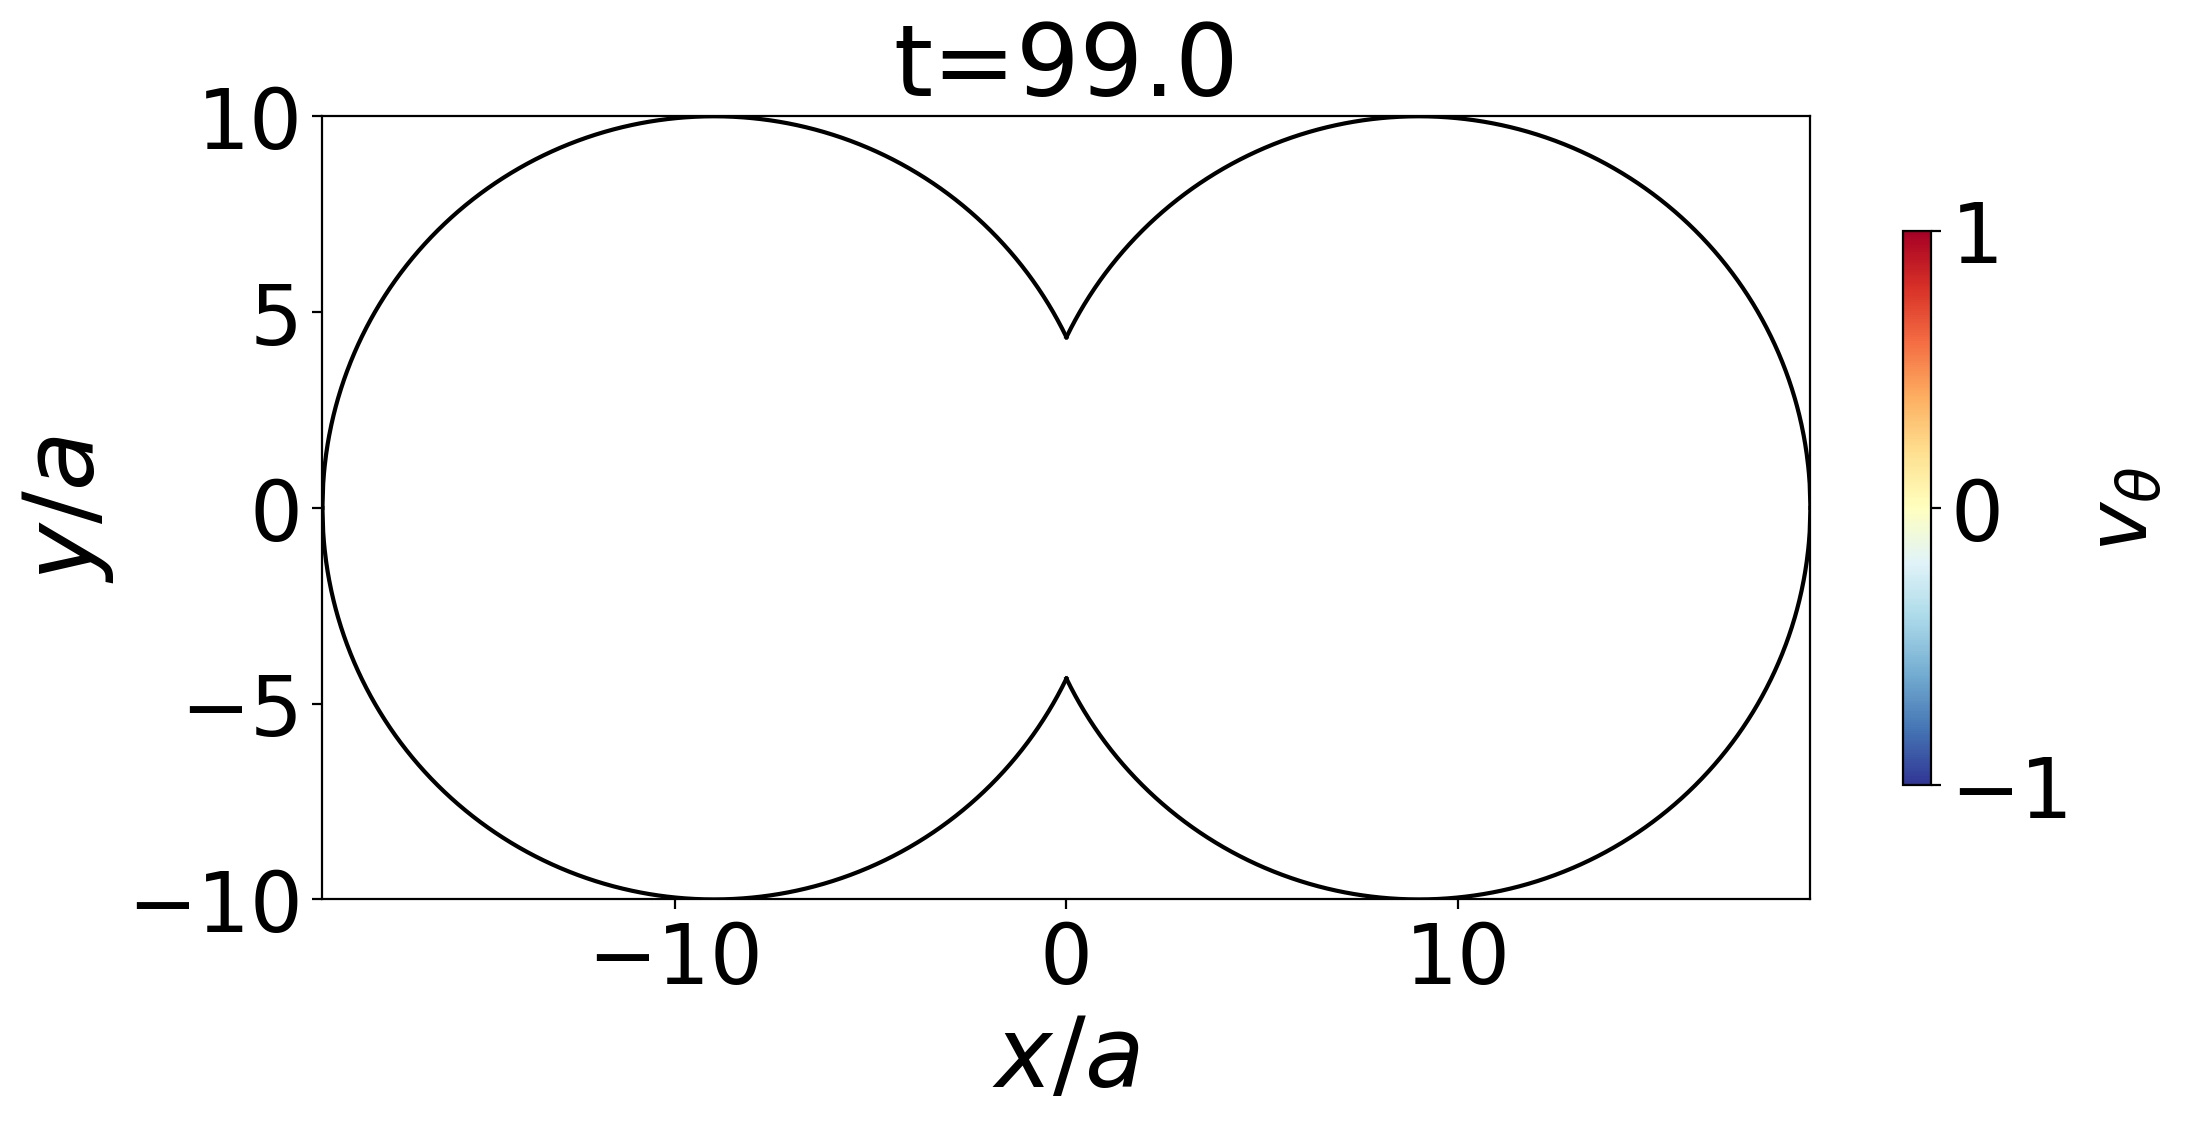

In [1]:
%matplotlib inline
import math
import matplotlib
%config InlineBackend.figure_format = 'retina'
import matplotlib.cm as cm  # colormap
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
# plt.rcParams["text.usetex"] =True
plt.rcParams["font.size"] = 30
#from matplotlib import patches
from matplotlib.collections import EllipseCollection
from matplotlib.patches import Circle

cmap = matplotlib.colormaps["Greys"]
cmap(0)
# Np=12800#8192#2048#
p=[]
def make_animation(moji,moji2,lo,R,tau,v0,Mg,filenum,vminmax,bit,Ms,kap):

    #cbのために適当なマップをダス:;
    # Normalize~mappable~colorbar(mappable)でも可。(粒子数が多いときはこちらの方が良いかも?);
    # アニメーション内部でプロットしたい場合は(update_normal(mappable)？使う前に検討);
    a= np.loadtxt("../{}/{}R{:.1f}_animelo{:.3f}Ms{:.3f}tau{:.3f}kap{:.3f}bit{:.3f}v0{:.1f}/tyokkei.dat".format(moji2,moji,R,lo,Ms,tau,kap,bit,v0), comments='#', unpack=True)
    
    x, y,vx,vy,theta = np.loadtxt("../{}/{}R{:.1f}_animelo{:.3f}Ms{:.3f}tau{:.3f}kap{:.3f}bit{:.3f}v0{:.1f}/coor_m{:.3f}_t{:n}.dat".format(moji2,moji,R,lo,Ms,tau,kap,bit,v0,Mg,0), comments='#', unpack=True)
    fig = plt.figure(figsize=(6*2,6))
    ax = fig.add_subplot(1,1,1)
    ax.set_aspect('equal')
    R_D=R
    def circleplot(R_i):
        x=np.linspace(0,R_i*(1+bit/2),1000)
        y=np.sqrt(R_i*R_i-(x-R_i*bit/2)*(x-R_i*bit/2))
        plt.plot(x,y,"-",color="k")
        plt.plot(x,-y,"-",color="k")
        plt.plot(-x,-y,"-",color="k")
        plt.plot(-x,y,"-",color="k")
    title=plt.title("t")

    plt.xlim(-R_D*(1+bit/2), R_D*(1+bit/2))
    plt.ylim(-R_D, R_D)
    plt.xlabel(r"$x/a$",color='k', size=35)
    plt.ylabel(r"$y/a$",color='k', size=35)
    rad_to_do=180/np.pi
    vect=ax.quiver(x,y,vx,vy,0,color='k',angles='xy',cmap=matplotlib.cm.cool,scale_units='xy',animated=True, alpha=1,lw=0.8, zorder=2)
    circleplot(R_D)
    # th=np.zeros_like(x)
    # a=np.ones_like(x)#などとやれば、xのと同じ長さの配列を得られる;
    global p
    p = EllipseCollection(a[1:]*kap,a[1:],theta*rad_to_do,units="xy", cmap=matplotlib.cm.RdYlBu_r,transOffset=ax.transData, alpha=1.0,fc='w',ec="k",lw=1,offsets=(np.c_[x,y]))
    p.set_clim(vmin=-vminmax, vmax=vminmax) 
    # p.set_clim(vmin=0, vmax=1) 
    #animated=true?hsv
    ax.add_collection(p)

    #カラーバーの上下端を明確に操作したければこっち
    #速さは不明
    
    from matplotlib.colors import Normalize
    from matplotlib.cm import  ScalarMappable
    norm = Normalize(vmin=-vminmax, vmax=vminmax)
    mappable = ScalarMappable(cmap=cm.RdYlBu_r, norm=norm)
    C=plt.colorbar(mappable,shrink=0.6,label=r"$v_{\theta}$")
    mappable._A = []
      
    def init():
        """
        何もしない関数。Funkanimationのinitfunkに何も指定しないとupdate_animのj＝0を2回繰り返される.
        本来は軸設定をするところ;
        """
        pass
    def update_anim(j):
        """アニメーションのための関数。引数を増やしたい場合はFunkanimationでfargs=()とする;

        Args:
            j (int): Funkanimationで渡される引数。0からfilemax;

        Returns:
            mappable: 時刻jでのマップ;
        """
        x, y,tx,ty,theta = np.loadtxt("../{}/{}R{:.1f}_animelo{:.3f}Ms{:.3f}tau{:.3f}kap{:.3f}bit{:.3f}v0{:.1f}/coor_m{:.3f}_t{:n}.dat".format(moji2,moji,R,lo,Ms,tau,kap,bit,v0,Mg,j*ratt), comments='#', unpack=True)
        global p
        p.remove()
        p = EllipseCollection(a[1:]*kap,a[1:],theta*rad_to_do,units="xy", cmap=matplotlib.cm.RdYlBu_r,transOffset=ax.transData, alpha=1.0,fc='w',ec="k",lw=1,offsets=(np.c_[x,y]), zorder=1)
        # p.set_array(f)
        p.set_clim(vmin=-vminmax, vmax=vminmax)
        ax.add_collection(p)
        title.set_text("t={}".format(a[0]*j*ratt))
        vect.set_offsets(np.c_[x,y])
        vect.set_UVC(kap*np.cos(theta),kap*np.sin(theta))
        return [p]


    ani = FuncAnimation(fig, update_anim,init_func=init(), interval=100, blit=True, frames = filenum)
    ani.save("./{}/{}R{}kap{}lo{}tau{}MS{}v0{}bit{}colmax{}pp.mp4".format(moji,moji,R,kap,lo,tau,Ms,v0,bit,vminmax),writer="ffmpeg")
    plt.show()
moji="ani_test"#"stwmssnpn0"
moji2="gaybane"#folder name.
lo=0.01
# R=10#np.sqrt(Np*0.25/lo)
tau=100
bit=1.8
R=10
v0=1
Ms=0.
Mg=0
kappa=3
# tbitani=3
ratt=1
min=0#minを有限にする機能はまだ;
max=100
filenum=max-min
vminmax=1.
from os import makedirs
fname=moji
makedirs('{}'.format(fname), exist_ok=True)
kaedata=[[],[1],[2,2,2,2,2]]#for の中の数字も変えること

col=[[],6]
#[moji,lo,tau,v0^2,Mgn,R,color,filenum,col,Ms,bit,kappa]
  #0   1    2  3   4    5 6.    7       8   9   10 11
datas=[[]]
sampl=[moji,lo,tau,v0,Mg,R,0,filenum,col,Ms,bit,kappa]
oo=len(kaedata[1])
for i in range(0,len(kaedata[1])):
    
    sample=[moji,lo,tau,v0,Mg,R,0,filenum,col,Ms,bit,kappa]
    for j in range(1,len(col)):
        sample[col[j]]=kaedata[j][i]
    sample[6]=(i)/len(kaedata[1])
    # print(sample)
    datas.append(sample)
for i in range(1,len(datas)):
    print(datas[i])
    make_animation(datas[i][0],moji2,datas[i][1],datas[i][5],datas[i][2],datas[i][3],datas[i][4],datas[i][7],vminmax,datas[i][10],datas[i][9],datas[i][11])
#保存



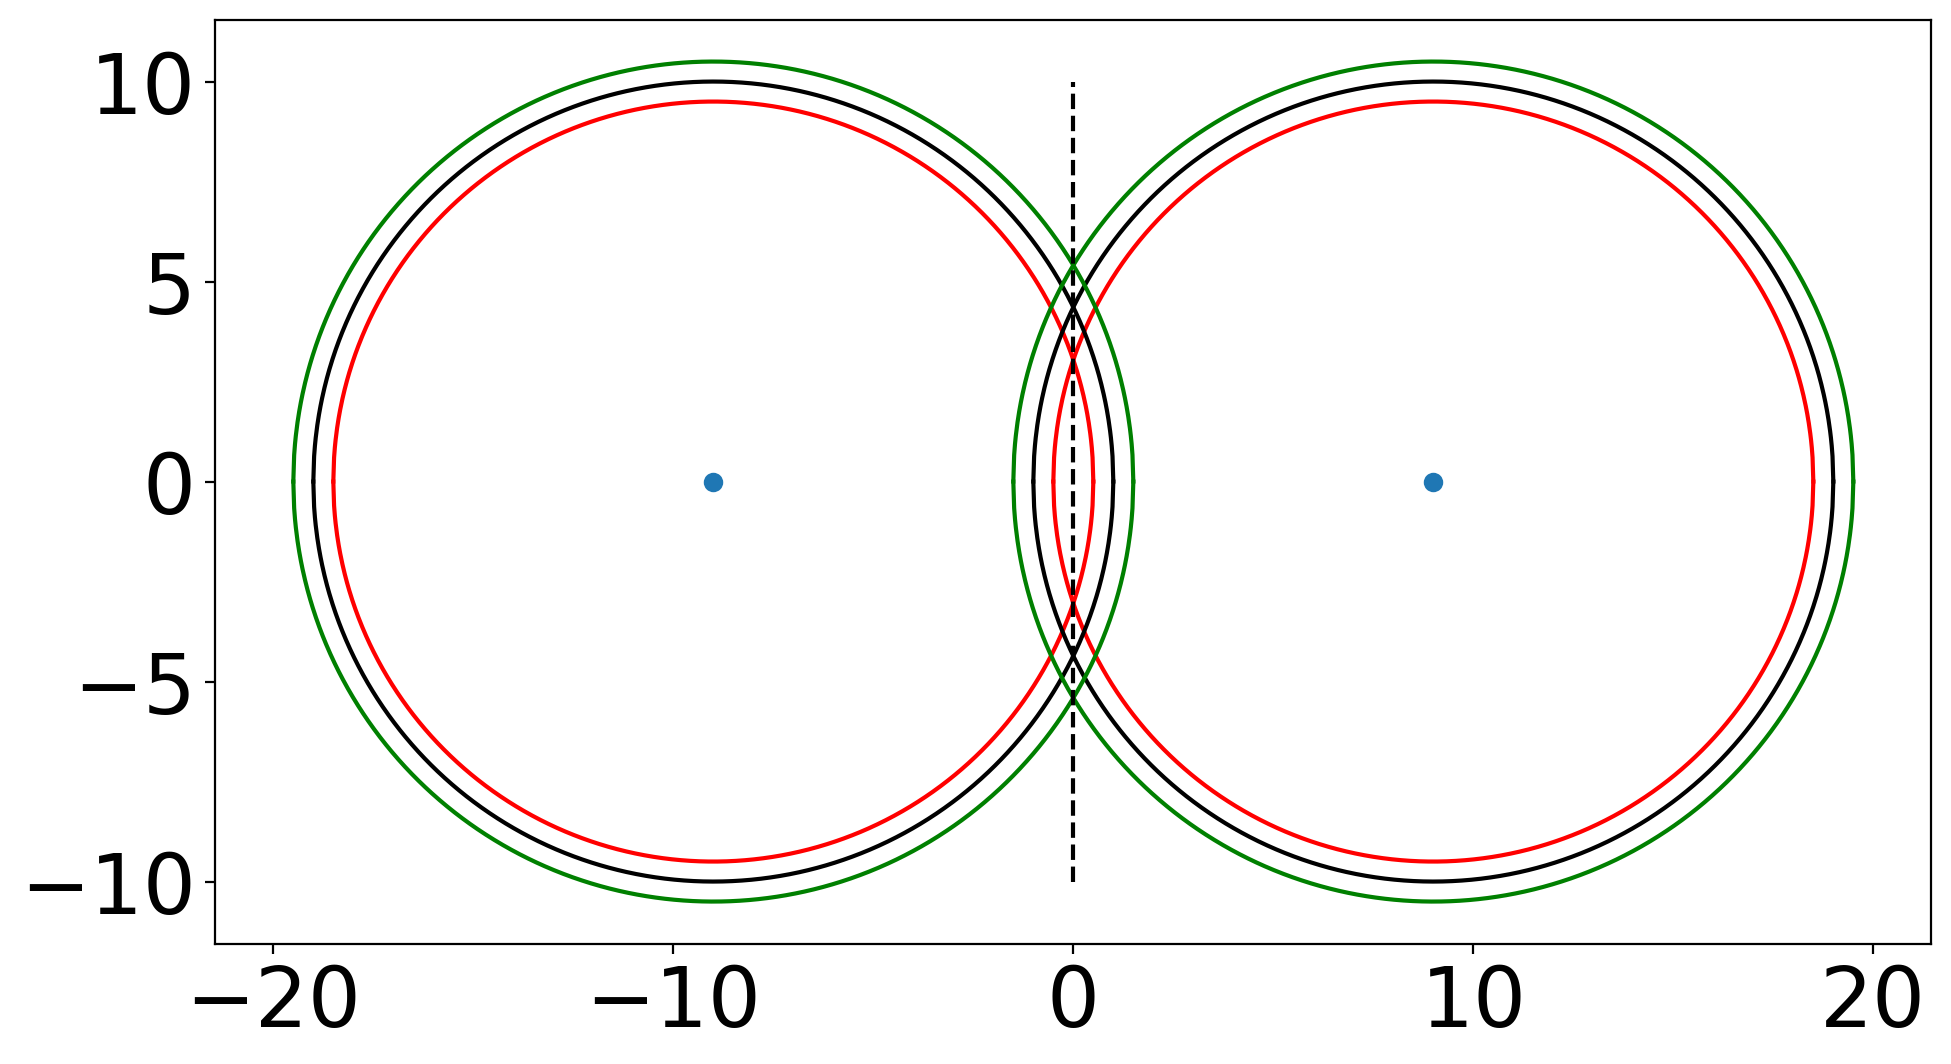

In [62]:
bit=1.8
fig = plt.figure(figsize=(6*2,6))
ax = fig.add_subplot(1,1,1)
ax.set_aspect('equal')
def plt_circle(R,x0,y0,col):
    x=np.linspace(-R,R,1000)
    y=np.sqrt(R*R-x*x)
    plt.plot(x+x0,y+y0,color=col)
    plt.plot(x+x0,-y-y0,color=col)
plt_circle(9.5,9,0,"r")
plt_circle(9.5,-9,0,"r")
plt_circle(10,9,0,"k")
plt_circle(10,-9,0,"k")
plt_circle(10.5,-9,0,"g")
plt_circle(10.5,9,0,"g")
x=np.linspace(-10,10,2)
plt.plot(0*x,x,"--",color="k")
plt.plot([9,-9],[0,0],"o")